<a href="https://colab.research.google.com/github/Hafadz-code/Capstone-2/blob/main/Capstone%20modul%202%20(TLC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latar belakang
berdasarkan situs resmi TLC berbunyi:
"*The New York City Taxi and Limousine Commission (TLC), created in 1971, is the agency responsible for licensing and regulating New York City's Medallion (Yellow) taxi cabs, for-hire vehicles (community-based liveries, black cars and luxury limousines), commuter vans, and paratransit vehicles. The Commission's Board consists of nine members, eight of whom are unsalaried Commissioners. The salaried Chair/ Commissioner presides over regularly scheduled public commission meetings and is the head of the agency, which maintains a staff of approximately 600 TLC employees*.

*Over 200,000 TLC licensees complete approximately 1,000,000 trips each day. To operate for hire, drivers must first undergo a background check, have a safe driving record, and complete 24 hours of driver training. TLC-licensed vehicles are inspected for safety and emissions at TLC's Woodside Inspection Facility*"

Sumber dapat diakses pada link berikut [klik link](https://www.nyc.gov/site/tlc/about/about-tlc.page).

berdasarkan data yang diterima terdapat penugasan dalam melakukan analisis yang dapat memberikan insight bagi perusahaan agar dapat memberikan dampak positif bagi perusahaan dari hasil analisis dan rekomendasi yang disarankan




# Pernyataan Masalah
kapan waktu yang tepat untuk menyediakan sejumlah layanan transportasi tambahan untuk memberikan pelayanan yang optimal dan mendapatkan revenue yang maksimal?

varibel yang digunakan dalam data analisis untuk menjawab problem statement diatas adalah:
**`lpep_pickup_datetime`** berdasarkan Hari dan Jam
**`PULocationID`** untuk melihat jumlah trip dan lokasi order
**`total_amount`** untuk melihat jumlah pendapatan


# Goals
1. potensi peningkatan kepuasan pelayanan pelanggan melalui peningkatan jumlah layanan yang disediakan
2. potensi estimasi peningkatan pendapatan

# Batasan masalah
1. tidak mengukur dan memperhitungkan nilai/indeks tingkat kepuasan pelanggan.
2. tidak menggunakan, membandingkan dan menguji metode-metode yang paling baik yang seharusnya digunakan.
3. rentang waktu dan lokasi yang digunakan sesuai dalam database
4. penggunaan analisis adalah karena pada setiap lokasi pasti ada drivernya yang standby, jika mau di tingkatkan pelayanannya maka harus menambah sarananya dan tidak ada alternatif lain (terutama pada lokasi yang berpotensi tidak membutuhkan banyaknya layanan berdasarkan rendahnya permintaan di daerah tersebut) naka analisis dilakukan dari waktu, sebab tidak setiap waktu ada drivernya dan jika ingin meningkatkan pelayanan maka dapat menambah layanan pada waktu tertentu atau dengan alternatif pemindahan sarana pada lokasi yang sepi ke lokasi yang padat pada titik puncak waktunya dan kembali pada posisi semula pada saat kembali normal.

# Perhitungan dan Pengujian statistik
1. perhitungan asumsi jumlah sarana (driver/armada) berdasarkan jumlah trip
2. penggunaan statistik deskriptif untuk menggambarkan sebaran trip pada waktu tertentu
3. prediksi rata-rata kenaikan jumlah trip dengan penambahan jumlah sarana (driver/armada)
5. menguji kausal penyebab 1 ke penyebab sebelumnya
4. menguji korelasi permasalahan terhadap akar penyebab
4. menguji korelasi peningkatan sarana (driver/armada) terhadap peningkatan pendapatan secara total
3. menguji korelasi keuntungan saat ini dibanding keuntungan sesudah rekomendasi
1. menghitung potensi pendapatan total setelah menindak-lanjuti rekomendasi


In [256]:
# Import library
import pandas as pd
import numpy as np
import pandas as pd

# Import visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import warnings
warnings.filterwarnings("ignore")

In [257]:
# import files
from google.colab import files
import io
upload_files = files.upload()

Saving NYC TLC Trip Record.csv to NYC TLC Trip Record (2).csv


# Data Understanding and Data Cleaning


Sebelum melakukan analisis perlu untuk melakukan Data Understanding dan Data Cleaning agar data yang diterima dapat dipahami dan lakukan pengolahan data.

Proses ini memiliki terdiri dari import library, import visualisasi, import file database, display data dan pemeriksaan data. Selanjutnya, dilakukan handling data duplicate, missing value, outlier, column, memeriksa anomaly, penyesuaian format data, copy data clean.

In [258]:
df = pd.read_csv('NYC TLC Trip Record.csv')
display(df.head(),df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


 Observasi data

In [259]:
# melihat bentuk data
print(f'Jumlah baris dan kolom pada dataset ini adalah {df.shape}')
df.info()

Jumlah baris dan kolom pada dataset ini adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64


In [260]:
# deskripsi data (numerik dan kategorik)
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [261]:
# unique value pada setiap kolom:
pd.set_option('display.max_colwidth', 1)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Value'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Value
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 20

In [262]:
# Jumlah dan persentase missing values pada dataset:
df.isna().sum()

VendorID                 0    
lpep_pickup_datetime     0    
lpep_dropoff_datetime    0    
store_and_fwd_flag       4324 
RatecodeID               4324 
PULocationID             0    
DOLocationID             0    
passenger_count          4324 
trip_distance            0    
fare_amount              0    
extra                    0    
mta_tax                  0    
tip_amount               0    
tolls_amount             0    
ehail_fee                68211
improvement_surcharge    0    
total_amount             0    
payment_type             4324 
trip_type                4334 
congestion_surcharge     4324 
dtype: int64

In [263]:
df.isna().sum()/df.shape[0]*100

VendorID                 0.000000  
lpep_pickup_datetime     0.000000  
lpep_dropoff_datetime    0.000000  
store_and_fwd_flag       6.339154  
RatecodeID               6.339154  
PULocationID             0.000000  
DOLocationID             0.000000  
passenger_count          6.339154  
trip_distance            0.000000  
fare_amount              0.000000  
extra                    0.000000  
mta_tax                  0.000000  
tip_amount               0.000000  
tolls_amount             0.000000  
ehail_fee                100.000000
improvement_surcharge    0.000000  
total_amount             0.000000  
payment_type             6.339154  
trip_type                6.353814  
congestion_surcharge     6.339154  
dtype: float64

In [264]:
# Data duplikat pada dataset:
print(f'Jumlah Data Duplikat pada dataset ini adalah {df.duplicated().sum()}')

Jumlah Data Duplikat pada dataset ini adalah 0


**Insight :**

* Terdapat **missing value** pada 7 kolom dari total 20 kolom yang ada.
* Kolom `'ehail_fee'` memiliki presentase **missing value** sebanyak 100%, sebaiknya dilakukan tindakan dengan menghapus 1 kolom tersebut seluruhnya karena tidak ada informasi yang bisa diambil dari kolom tersebut.
* Ada 6 kolom lainnya yang memiliki **missing value** dengan presentase sebanyak 6.4% dan 6.5% yaitu sebanyak 4324 dan 4334 data **missing value** dari total 68211 data yang ada. Kolom **missing value** tersebut yaitu kolom `'store_and_fwd_flag'`,  `'RatecodeID'`,  `'passenger_count'`,  `'payment_type'`,  `'trip_type'`, dan  `'trip_type'`.
* Tidak terdapat data duplikat pada dataset tersebut.


Ada 2 cara untuk menangani *missing value*:
* Pertama, menghapus baris/kolom yang berisi **missing value**. Kolom `'ehail_fee'` memiliki presentase 100% **missing value**, maka sebaiknya kolom ini dihapus.
* Kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*.

Cleaning data

In [265]:
# kolom yang numerikal yang akan dianalisis
numericals = ['total_amount', 'passenger_count']

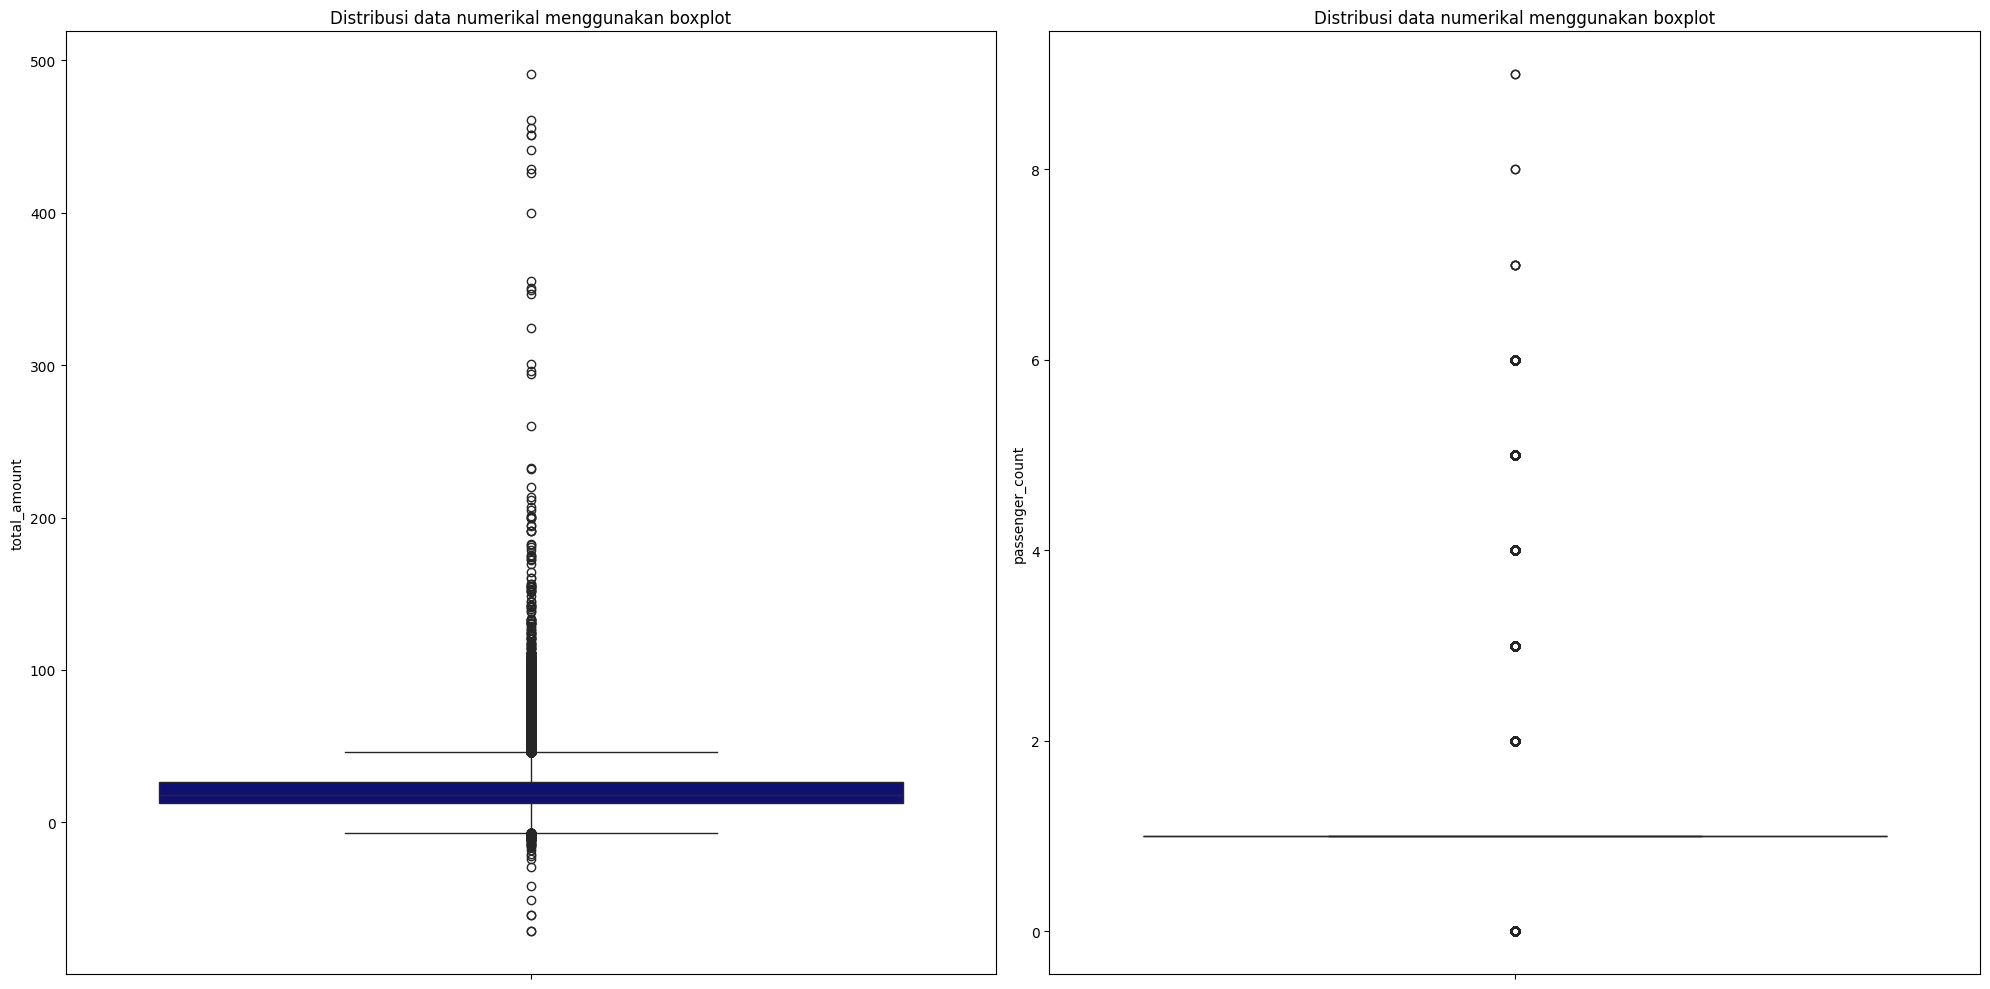

In [266]:
# menampilkan distribusi data menggunakan boxplot
plt.figure(figsize=(20,10))
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color = 'navy', orient = 'v')
    plt.tight_layout()
    plt.title('Distribusi data numerikal menggunakan boxplot')

plt.show()

**a. Menghapus kolom `'ehail_fee'`**

Kolom `'ehail_fee'` dihapus karena memiliki **missing value** dengan presentase 100% atau tidak ada data terdapat didalamnya.

In [267]:
# drop/hapus pada kolom "ehail_fee" karena missing valuenya mencapai 100%
df = df.drop(columns = ['ehail_fee'])
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00


In [268]:
df.isna().sum()

VendorID                 0   
lpep_pickup_datetime     0   
lpep_dropoff_datetime    0   
store_and_fwd_flag       4324
RatecodeID               4324
PULocationID             0   
DOLocationID             0   
passenger_count          4324
trip_distance            0   
fare_amount              0   
extra                    0   
mta_tax                  0   
tip_amount               0   
tolls_amount             0   
improvement_surcharge    0   
total_amount             0   
payment_type             4324
trip_type                4334
congestion_surcharge     4324
dtype: int64

**b. Menghapus anomali pada kolom 'RatecodeID'**

Terdapat anomali pada kolom 'RatecodeID' yaitu terdapat nilai '99', padahal merujuk pada dictionary kolom 'RatecodeID' hanya terdapat nilai 1 - 6 sebagai berikut :

	1 = Tarif standar
	2 = JFK
	3 = Taman Baru
	4 = Nassau atau Westchester
	5 = Tarif yang dinegosiasikan
	6 = Perjalanan berkelompok

Maka baris yang 'RatecodeID' nya bernilai 99 akan dilakukan tindakan berupa penghapusan.

In [269]:
# menampilkan baris yang 'RatecodeID' nya == 99
df[df['RatecodeID'] == 99]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,1.0,19.7,1.0,NaN,0.0
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,1.0,25.0,1.0,NaN,0.0
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,1.0,29.7,1.0,NaN,0.0
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,1.0,24.0,1.0,NaN,0.0
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,1.0,25.7,1.0,NaN,0.0
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,N,99.0,150,123,1.0,1.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,N,99.0,90,68,1.0,0.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,N,99.0,265,123,1.0,14.6,40.2,0.0,1.5,0.0,0.0,1.0,41.7,1.0,NaN,0.0
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,N,99.0,150,123,1.0,1.4,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,N,99.0,244,248,1.0,28.3,50.2,0.0,1.5,0.0,0.0,1.0,51.7,1.0,NaN,0.0


In [270]:
# menghapus baris yang 'RatecodeID' nya == 99
df = df.drop(df[df.RatecodeID == 99].index)

**c. Mengisi missing value pada kolom 'RatecodeID'**

Terdapat missing value pada kolom 'RatecodeID' yang akan diisikan dengan median pada kolom tersebut.

In [271]:
# Terdapat nilai unik 'nan' atau missing value pada kolom 'RatecodeID'
df['RatecodeID'].unique()

array([ 1.,  5.,  4.,  3.,  2., nan])

In [272]:
# Dicari nilai median dari kolom 'RatecodeID' tersebut --> 1
df['RatecodeID'].median()

1.0

In [273]:
# Dicari nilai modus dari kolom 'RatecodeID' tersebut --> 1
df['RatecodeID'].mode()

0    1.0
Name: RatecodeID, dtype: float64

In [274]:
# Dicari nilai median dari kolom 'RatecodeID' tersebut --> 1
ratecodeID_median = df['RatecodeID'].median()
ratecodeID_median

1.0

In [275]:
# Kolom 'RatecodeID' akan diisikan dengan nilai 1 berdasarkan median yang didapat
df['RatecodeID'].fillna(ratecodeID_median, inplace=True)

In [276]:
# Pada kolom 'RatecodeID' sudah tidak terdapat missing value
df['RatecodeID'].unique()

array([1., 5., 4., 3., 2.])

In [277]:
# kolom 'RatecodeID' sudah tidak memiliki missing value
df.isna().sum()

VendorID                 0   
lpep_pickup_datetime     0   
lpep_dropoff_datetime    0   
store_and_fwd_flag       4324
RatecodeID               0   
PULocationID             0   
DOLocationID             0   
passenger_count          4324
trip_distance            0   
fare_amount              0   
extra                    0   
mta_tax                  0   
tip_amount               0   
tolls_amount             0   
improvement_surcharge    0   
total_amount             0   
payment_type             4324
trip_type                4324
congestion_surcharge     4324
dtype: int64

**d. Mengisi missing value pada kolom 'trip_type'**

Terdapat missing value pada kolom 'trip_type' yang akan diisikan dengan median pada kolom tersebut. Terdapat 2 kode pada kolom 'type_type' yaitu :
    
     1 : Melambaikan tangan
     2 : Pesan secara online

In [278]:
# Terdapat nilai unik 'nan' atau missing value pada kolom 'trip_distance'
df['trip_type'].unique()

array([ 1.,  2., nan])

In [279]:
# Nilai median pada kolom 'trip_type' --> 1
df['trip_type'].median()

1.0

In [280]:
# Nilai modus pada kolom 'trip_type' --> 1
df['trip_type'].mode()

0    1.0
Name: trip_type, dtype: float64

In [281]:
# Dicari nilai median dari kolom 'trip_type' tersebut --> 1
triptype_median = df['trip_type'].median()
triptype_median

1.0

In [282]:
# Kolom 'trip_type akan diisikan dengan nilai 1 berdasarkan median yang didapat
df['trip_type'].fillna(triptype_median, inplace=True)

In [283]:
# Pada kolom 'RatecodeID' sudah tidak terdapat missing value
df['trip_type'].unique()

array([1., 2.])

In [284]:
# kolom 'tyip_type' sudah tidak memiliki missing value
df.isna().sum()

VendorID                 0   
lpep_pickup_datetime     0   
lpep_dropoff_datetime    0   
store_and_fwd_flag       4324
RatecodeID               0   
PULocationID             0   
DOLocationID             0   
passenger_count          4324
trip_distance            0   
fare_amount              0   
extra                    0   
mta_tax                  0   
tip_amount               0   
tolls_amount             0   
improvement_surcharge    0   
total_amount             0   
payment_type             4324
trip_type                0   
congestion_surcharge     4324
dtype: int64

**e. Mengisi missing value pada kolom 'Payment_type'**

Pada kolom 'payment_type', terdapat 6 pilihan yaitu :

	1 = Kartu kredit
	2 = Uang tunai
	3 = Tanpa biaya
	4 = Sengketa
	5 = Tidak diketahui
	6 = Perjalanan dibatalkan

Missing value akan diisikan dengan nilai '5' yaitu 'Payment_type' nya 'Tidak Diketahui'

In [285]:
df['payment_type'].unique()

array([ 1.,  2.,  3.,  4.,  5., nan])

Terdapat **missing value** pada kolom `'payment_type'`, maka akan diisikan dengan nilai 5 --> yaitu 'payment_type' nya (Tidak diketahui)

In [286]:
# Akan dilakukan tindakan dengan mengisikan nilai missing value dengan value 5
# Karena 'payment_type' nya tidak diketahui

fill_payment_type = df['payment_type'].fillna(5.0, inplace=True)

In [287]:
# kolom 'payment_type' sudah tidak memiliki missing value
df.isna().sum()

VendorID                 0   
lpep_pickup_datetime     0   
lpep_dropoff_datetime    0   
store_and_fwd_flag       4324
RatecodeID               0   
PULocationID             0   
DOLocationID             0   
passenger_count          4324
trip_distance            0   
fare_amount              0   
extra                    0   
mta_tax                  0   
tip_amount               0   
tolls_amount             0   
improvement_surcharge    0   
total_amount             0   
payment_type             0   
trip_type                0   
congestion_surcharge     4324
dtype: int64

**f. Mengisi missing value pada kolom 'store_and_fwd_flag'**
Dari kolom `'store_and_fwd_flag'` memiliki 2 value yaitu :

    Y = menyimpan dan meneruskan perjalanan
	N = bukan perjalanan simpan dan maju

Akan diambil nilai yang paling banyak muncul atau modus --> mode untuk mengisi **missing value**

In [288]:
# Akan dicari mode() dari kolom 'store_and_fwd_flag'
store_and_fwd_flag_mode = df[['store_and_fwd_flag']].mode()
store_and_fwd_flag_mode

,store_and_fwd_flag
0,N


In [289]:
# Buat fungsi lambda untuk konversi
convert_flag = lambda x: 1 if x == 'Y' else 0

# Terapkan fungsi lambda pada kolom 'store_and_fwd_flag'
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].apply(convert_flag)

# Ubah tipe data kolom menjadi float
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype(float)

# Tampilkan DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 68201 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68201 non-null  int64  
 1   lpep_pickup_datetime   68201 non-null  object 
 2   lpep_dropoff_datetime  68201 non-null  object 
 3   store_and_fwd_flag     68201 non-null  float64
 4   RatecodeID             68201 non-null  float64
 5   PULocationID           68201 non-null  int64  
 6   DOLocationID           68201 non-null  int64  
 7   passenger_count        63877 non-null  float64
 8   trip_distance          68201 non-null  float64
 9   fare_amount            68201 non-null  float64
 10  extra                  68201 non-null  float64
 11  mta_tax                68201 non-null  float64
 12  tip_amount             68201 non-null  float64
 13  tolls_amount           68201 non-null  float64
 14  improvement_surcharge  68201 non-null  float64
 15  total_a

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68201 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68201 non-null  int64  
 1   lpep_pickup_datetime   68201 non-null  object 
 2   lpep_dropoff_datetime  68201 non-null  object 
 3   store_and_fwd_flag     68201 non-null  float64
 4   RatecodeID             68201 non-null  float64
 5   PULocationID           68201 non-null  int64  
 6   DOLocationID           68201 non-null  int64  
 7   passenger_count        63877 non-null  float64
 8   trip_distance          68201 non-null  float64
 9   fare_amount            68201 non-null  float64
 10  extra                  68201 non-null  float64
 11  mta_tax                68201 non-null  float64
 12  tip_amount             68201 non-null  float64
 13  tolls_amount           68201 non-null  float64
 14  improvement_surcharge  68201 non-null  float64
 15  total_a

In [291]:
# Value yang awalnya 'Y' dan'N' telah berubah menjadi typedata float
# Karena jika masih berupa string, tidak bisa diambil mode() nya
store_and_fwd_flag_mode = df[['store_and_fwd_flag']].mode()
store_and_fwd_flag_mode

,store_and_fwd_flag
0,0.0


In [292]:
# Karena mode() dari kolom 'store_and_fwd_flag' sudah diketahui
# Akan dilakukan fungsi fillna() untuk mengisi missing value
df[['store_and_fwd_flag']].fillna(store_and_fwd_flag_mode, inplace=True)

In [293]:
# kolom 'store_and_fwd_flag' sudah tidak memiliki missing value
df.isna().sum()

VendorID                 0   
lpep_pickup_datetime     0   
lpep_dropoff_datetime    0   
store_and_fwd_flag       0   
RatecodeID               0   
PULocationID             0   
DOLocationID             0   
passenger_count          4324
trip_distance            0   
fare_amount              0   
extra                    0   
mta_tax                  0   
tip_amount               0   
tolls_amount             0   
improvement_surcharge    0   
total_amount             0   
payment_type             0   
trip_type                0   
congestion_surcharge     4324
dtype: int64

**g. Mengisi missing value pada kolom 'passenger_count'**
Terdapat **missing value** pada kolom `'passenger_count'`, maka akan diisikan value nya dengan nilai median nya. Karena tidak mungkin penumpangnya <= 0.

In [294]:
# terdapat missing value pada kolom 'passenger_count' --> nan,
# akan diisikan dengan nilai mediannya
df['passenger_count'].unique()

array([ 1.,  2.,  4.,  3.,  6.,  5.,  0.,  7.,  9.,  8., nan])

In [295]:
# Untuk mengetahui nilai mediannya
passengercount_median = df['passenger_count'].median()
passengercount_median

1.0

In [296]:
# Dilakukan fillna() untuk mengisikan missing valuenya dengan nilai median
df['passenger_count'].fillna(passengercount_median, inplace=True)

In [297]:
# kolom 'passenger_count' sudah tidak memiliki missing value
df.isna().sum()

VendorID                 0   
lpep_pickup_datetime     0   
lpep_dropoff_datetime    0   
store_and_fwd_flag       0   
RatecodeID               0   
PULocationID             0   
DOLocationID             0   
passenger_count          0   
trip_distance            0   
fare_amount              0   
extra                    0   
mta_tax                  0   
tip_amount               0   
tolls_amount             0   
improvement_surcharge    0   
total_amount             0   
payment_type             0   
trip_type                0   
congestion_surcharge     4324
dtype: int64

**h. Mengisi missing value pada kolom 'congestion_surcharge'**
Kolom `'congestion_surcharge'` akan diisikan dengan nilai median dari kolom tersebut

In [298]:
# mencari nilai median dari kolom 'congestion_surcharge'
df['congestion_surcharge'].median()

0.0

In [299]:
# dibuat variable untuk mewakili median dari kolom 'congestion_surcharge'
congestion_surcharge_median = df['congestion_surcharge'].median()

In [300]:
# Mengisikan median yaitu 0, pada kolom 'congestion_surcharge'
df['congestion_surcharge'].fillna(congestion_surcharge_median, inplace=True)

In [301]:
# kolom 'congestion_surcharge' sudah tidak memiliki missing value
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

In [302]:
# menampilkan dataframe
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0.0,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0.0,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,0.0,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0.0,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0.0,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,0.0,1.0,49,62,1.0,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,5.0,1.0,0.00
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,0.0,1.0,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,5.0,1.0,0.00
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,0.0,1.0,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,5.0,1.0,0.00
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,0.0,1.0,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,5.0,1.0,0.00


Sudah tidak terdapat **missing value** pada dataset, selanjutnya akan dicek anomali yang ada pada dataset

<Axes: >

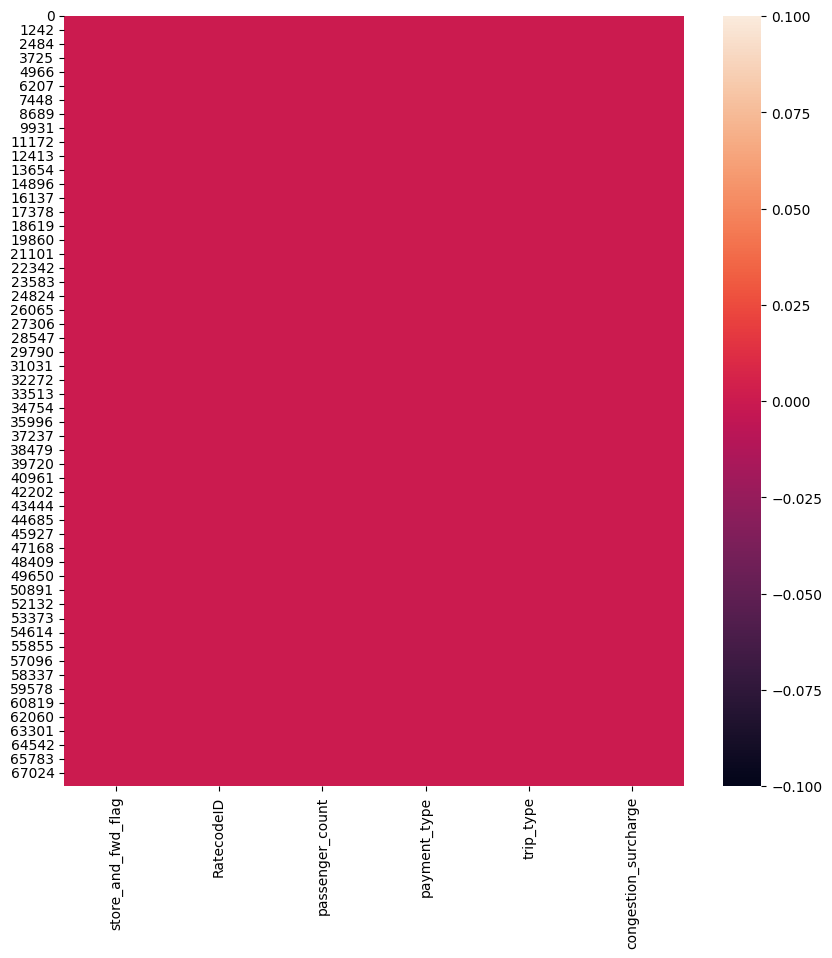

In [303]:
# Sebaran missing value di dalam data menggunakan heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df[['store_and_fwd_flag','RatecodeID','passenger_count','payment_type','trip_type','congestion_surcharge']].isna())

## **Mengecek Anomali pada dataset**

Ditemukan anomali pada kolom `'total_amount'` < 0 yaitu nilainya negatif, tidak mungkin 'total_amount' bernilai negatif. Maka baris yang 'total_amount'nya negatif akan dilakukan tindakan berupa penghapusan baris tersebut.

In [304]:
# jumlah data yang 'total_amount' nya kurang dari $1
df[df['total_amount'] < 1 ].count()

VendorID                 249
lpep_pickup_datetime     249
lpep_dropoff_datetime    249
store_and_fwd_flag       249
RatecodeID               249
PULocationID             249
DOLocationID             249
passenger_count          249
trip_distance            249
fare_amount              249
extra                    249
mta_tax                  249
tip_amount               249
tolls_amount             249
improvement_surcharge    249
total_amount             249
payment_type             249
trip_type                249
congestion_surcharge     249
dtype: int64

In [305]:
# data yang 'total_amount' nya < 1 akan dihapus
df.drop(df.index[df['total_amount'] < 1 ], inplace=True)

Ditemukan anomali pada kolom `'trip_distance'` 500 mil, tetapi total_amount nya tidak masuk akal. Maka baris yang 'trip_distance'nya > 500 mil akan dilakukan tindakan berupa penghapusan baris tersebut.

In [306]:
# menampilkan baris yang 'trip_distance' nya > 500
df[df['trip_distance'] > 500]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
33373,2,2023-01-17 18:40:38,2023-01-17 19:04:45,0.0,5.0,82,236,1.0,1571.97,29.97,0.0,0.0,3.04,6.55,1.0,43.31,1.0,1.0,2.75
63995,2,2023-01-01 12:35:00,2023-01-01 12:58:00,0.0,1.0,181,137,1.0,579.63,28.49,0.0,0.0,4.84,0.00,1.0,37.08,5.0,1.0,0.00
64446,2,2023-01-05 08:39:00,2023-01-05 08:58:00,0.0,1.0,193,140,1.0,2555.47,23.68,0.0,0.0,0.49,0.00,1.0,27.92,5.0,1.0,0.00
64558,2,2023-01-05 17:21:00,2023-01-05 17:26:00,0.0,1.0,49,65,1.0,3077.89,12.02,0.0,0.0,4.00,0.00,1.0,17.02,5.0,1.0,0.00
64572,2,2023-01-05 18:07:00,2023-01-05 18:13:00,0.0,1.0,193,193,1.0,2606.52,11.00,0.0,0.0,1.20,0.00,1.0,13.20,5.0,1.0,0.00
64609,2,2023-01-06 07:27:00,2023-01-06 07:30:00,0.0,1.0,41,74,1.0,43392.12,12.02,0.0,0.0,2.60,0.00,1.0,15.62,5.0,1.0,0.00
64947,2,2023-01-08 23:47:00,2023-01-08 23:59:00,0.0,1.0,52,79,1.0,2446.53,23.89,0.0,0.0,4.34,0.00,1.0,31.98,5.0,1.0,0.00
64954,2,2023-01-09 04:28:00,2023-01-09 04:46:00,0.0,1.0,119,20,1.0,2027.31,20.64,0.0,0.0,1.00,0.00,1.0,22.64,5.0,1.0,0.00
65149,2,2023-01-10 15:40:00,2023-01-10 16:24:00,0.0,1.0,26,37,1.0,1082.45,49.80,0.0,0.0,0.95,0.00,1.0,51.75,5.0,1.0,0.00
65194,2,2023-01-11 06:02:00,2023-01-11 06:32:00,0.0,1.0,69,90,1.0,120098.84,46.82,0.0,0.0,2.00,0.00,1.0,52.57,5.0,1.0,0.00


In [307]:
# Dilakukan penghapusan terhadap 35 data yang 'trip_distance' > 500
df[df['trip_distance'] > 500].count()

VendorID                 35
lpep_pickup_datetime     35
lpep_dropoff_datetime    35
store_and_fwd_flag       35
RatecodeID               35
PULocationID             35
DOLocationID             35
passenger_count          35
trip_distance            35
fare_amount              35
extra                    35
mta_tax                  35
tip_amount               35
tolls_amount             35
improvement_surcharge    35
total_amount             35
payment_type             35
trip_type                35
congestion_surcharge     35
dtype: int64

In [308]:
# baris yang 'trip_distance' nya > 500 mil akan dihapus
df.drop(df.index[df['trip_distance'] > 500 ], inplace=True)

berdasarkan salah satu referensi harga taksi di New York City mulai dari $1.9.
Terdapat anomali yaitu 'total_amount' < 1.9, maka akan dilakukan penghapusan pada baris tersebut.
Harga taksi normal adalah 4.40 USD atau Untuk perjalanan 1 km di Kota New York harus membayar 1.90 USD.
Sumber data dapat diakses [di sini](https://hikersbay.com/prices/usa/newyork?lang=id#num-prices-transportation).

In [309]:
# menampilkan baris yang 'total_amount' nya < $4.4
df[df['total_amount'] < 4.4].count()

VendorID                 96
lpep_pickup_datetime     96
lpep_dropoff_datetime    96
store_and_fwd_flag       96
RatecodeID               96
PULocationID             96
DOLocationID             96
passenger_count          96
trip_distance            96
fare_amount              96
extra                    96
mta_tax                  96
tip_amount               96
tolls_amount             96
improvement_surcharge    96
total_amount             96
payment_type             96
trip_type                96
congestion_surcharge     96
dtype: int64

In [310]:
# menghapus baris yang 'total_amount' nya < $4.4
df.drop(df.index[df['total_amount'] < 4.4], inplace=True)

Akan dicek nilai maksimal pada kolom 'total_amount'

In [311]:
df['total_amount'].max()

491.0

In [312]:
df['total_amount'].min()

4.5

In [313]:
# Selanjutnya akan dibuat index, untuk reset index pada setiap barisnya
x = df.reset_index()
df =  x.drop(columns='index')

In [314]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0.0,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0.0,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,0.0,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0.0,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0.0,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00


Mengganti type data pada kolom `'lpep_pickup_datetime'` menjadi date time agar mendapat nilai jam, hari, minggunya

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67821 entries, 0 to 67820
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               67821 non-null  int64  
 1   lpep_pickup_datetime   67821 non-null  object 
 2   lpep_dropoff_datetime  67821 non-null  object 
 3   store_and_fwd_flag     67821 non-null  float64
 4   RatecodeID             67821 non-null  float64
 5   PULocationID           67821 non-null  int64  
 6   DOLocationID           67821 non-null  int64  
 7   passenger_count        67821 non-null  float64
 8   trip_distance          67821 non-null  float64
 9   fare_amount            67821 non-null  float64
 10  extra                  67821 non-null  float64
 11  mta_tax                67821 non-null  float64
 12  tip_amount             67821 non-null  float64
 13  tolls_amount           67821 non-null  float64
 14  improvement_surcharge  67821 non-null  float64
 15  to

In [316]:
# mengubah typedata pada kolom 'lpep_pickup_datetime' yang awalnya objek menjadi datetime
df['lpep_pickup_datetime'] = df['lpep_pickup_datetime'].astype('datetime64[ns]')

In [317]:
# mengekstrak hari pada kolom 'lpep_pickup_datetime', lalu membuat kolom baru yang diisikan dengan nama hari dari setiap transaksi, tanggal, serta jam nya
df['Day'] = df['lpep_pickup_datetime'].dt.day_name()
df['Date'] = df['lpep_pickup_datetime'].dt.date
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Day,Date
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0.0,1.0,166,143,1.0,2.58,14.90,...,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Sunday,2023-01-01
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0.0,1.0,24,43,1.0,1.81,10.70,...,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Sunday,2023-01-01
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,0.0,1.0,223,179,1.0,0.00,7.20,...,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,Sunday,2023-01-01
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0.0,1.0,41,238,1.0,1.30,6.50,...,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Sunday,2023-01-01
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0.0,1.0,41,74,1.0,1.10,6.00,...,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Sunday,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67816,2,2023-01-31 21:56:00,2023-01-31 22:14:00,0.0,1.0,75,186,1.0,3.92,20.72,...,0.0,1.25,0.0,0.3,25.02,5.0,1.0,0.00,Tuesday,2023-01-31
67817,2,2023-01-31 22:40:00,2023-01-31 22:48:00,0.0,1.0,10,205,1.0,2.14,4.41,...,0.0,0.00,0.0,1.0,5.41,5.0,1.0,0.00,Tuesday,2023-01-31
67818,2,2023-01-31 23:46:00,2023-02-01 00:02:00,0.0,1.0,66,37,1.0,3.44,16.53,...,0.0,3.51,0.0,1.0,21.04,5.0,1.0,0.00,Tuesday,2023-01-31
67819,2,2023-01-31 23:01:00,2023-01-31 23:19:00,0.0,1.0,225,189,1.0,3.03,14.98,...,0.0,3.20,0.0,1.0,19.18,5.0,1.0,0.00,Tuesday,2023-01-31


In [318]:
# mengekstrak jam pada kolom 'lpep_pickup_datetime', lalu membuat kolom baru
# diisikan dengan jam dari setiap transaksi
df['hour'] = df['lpep_pickup_datetime'].dt.hour
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Day,Date,hour
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0.0,1.0,166,143,1.0,2.58,14.90,...,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Sunday,2023-01-01,0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0.0,1.0,24,43,1.0,1.81,10.70,...,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Sunday,2023-01-01,0
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,0.0,1.0,223,179,1.0,0.00,7.20,...,1.94,0.0,1.0,11.64,1.0,1.0,0.00,Sunday,2023-01-01,0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0.0,1.0,41,238,1.0,1.30,6.50,...,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Sunday,2023-01-01,0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0.0,1.0,41,74,1.0,1.10,6.00,...,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Sunday,2023-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67816,2,2023-01-31 21:56:00,2023-01-31 22:14:00,0.0,1.0,75,186,1.0,3.92,20.72,...,1.25,0.0,0.3,25.02,5.0,1.0,0.00,Tuesday,2023-01-31,21
67817,2,2023-01-31 22:40:00,2023-01-31 22:48:00,0.0,1.0,10,205,1.0,2.14,4.41,...,0.00,0.0,1.0,5.41,5.0,1.0,0.00,Tuesday,2023-01-31,22
67818,2,2023-01-31 23:46:00,2023-02-01 00:02:00,0.0,1.0,66,37,1.0,3.44,16.53,...,3.51,0.0,1.0,21.04,5.0,1.0,0.00,Tuesday,2023-01-31,23
67819,2,2023-01-31 23:01:00,2023-01-31 23:19:00,0.0,1.0,225,189,1.0,3.03,14.98,...,3.20,0.0,1.0,19.18,5.0,1.0,0.00,Tuesday,2023-01-31,23


Mengganti type data pada kolom `'lpep_dropoff_datetime'` menjadi date time.

In [319]:
# mengubah typedata pada kolom 'lpep_dropoff_datetime' yang awalnya objek menjadi datetime
df['lpep_dropoff_datetime'] = df['lpep_dropoff_datetime'].astype('datetime64[ns]')

In [320]:
# kolom 'lpep_pickup_datetime' dan 'lpep_dropoff_datetime' sudah dirubah datatype nya
# menjadi format datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67821 entries, 0 to 67820
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               67821 non-null  int64         
 1   lpep_pickup_datetime   67821 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  67821 non-null  datetime64[ns]
 3   store_and_fwd_flag     67821 non-null  float64       
 4   RatecodeID             67821 non-null  float64       
 5   PULocationID           67821 non-null  int64         
 6   DOLocationID           67821 non-null  int64         
 7   passenger_count        67821 non-null  float64       
 8   trip_distance          67821 non-null  float64       
 9   fare_amount            67821 non-null  float64       
 10  extra                  67821 non-null  float64       
 11  mta_tax                67821 non-null  float64       
 12  tip_amount             67821 non-null  float64       
 13  t

In [321]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Day,Date,hour
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0.0,1.0,166,143,1.0,2.58,14.9,...,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Sunday,2023-01-01,0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0.0,1.0,24,43,1.0,1.81,10.7,...,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Sunday,2023-01-01,0
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,0.0,1.0,223,179,1.0,0.00,7.2,...,1.94,0.0,1.0,11.64,1.0,1.0,0.00,Sunday,2023-01-01,0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0.0,1.0,41,238,1.0,1.30,6.5,...,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Sunday,2023-01-01,0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0.0,1.0,41,74,1.0,1.10,6.0,...,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Sunday,2023-01-01,0


In [322]:
# mengekstrak bulan pada kolom 'lpep_pickup_datetime', lalu membuat kolom baru
# diisikan dengan nama bulan dari setiap transaksi
df['month'] = df['lpep_pickup_datetime'].dt.month
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Day,Date,hour,month
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0.0,1.0,166,143,1.0,2.58,14.90,...,0.0,1.0,24.18,1.0,1.0,2.75,Sunday,2023-01-01,0,1
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0.0,1.0,24,43,1.0,1.81,10.70,...,0.0,1.0,15.84,1.0,1.0,0.00,Sunday,2023-01-01,0,1
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,0.0,1.0,223,179,1.0,0.00,7.20,...,0.0,1.0,11.64,1.0,1.0,0.00,Sunday,2023-01-01,0,1
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0.0,1.0,41,238,1.0,1.30,6.50,...,0.0,1.0,10.20,1.0,1.0,0.00,Sunday,2023-01-01,0,1
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0.0,1.0,41,74,1.0,1.10,6.00,...,0.0,1.0,8.00,1.0,1.0,0.00,Sunday,2023-01-01,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67816,2,2023-01-31 21:56:00,2023-01-31 22:14:00,0.0,1.0,75,186,1.0,3.92,20.72,...,0.0,0.3,25.02,5.0,1.0,0.00,Tuesday,2023-01-31,21,1
67817,2,2023-01-31 22:40:00,2023-01-31 22:48:00,0.0,1.0,10,205,1.0,2.14,4.41,...,0.0,1.0,5.41,5.0,1.0,0.00,Tuesday,2023-01-31,22,1
67818,2,2023-01-31 23:46:00,2023-02-01 00:02:00,0.0,1.0,66,37,1.0,3.44,16.53,...,0.0,1.0,21.04,5.0,1.0,0.00,Tuesday,2023-01-31,23,1
67819,2,2023-01-31 23:01:00,2023-01-31 23:19:00,0.0,1.0,225,189,1.0,3.03,14.98,...,0.0,1.0,19.18,5.0,1.0,0.00,Tuesday,2023-01-31,23,1


Data yang akan dianalisis adalah data pada bulan 01 Januari 2023 - 31 Januari 2023, maka data yang diluar rentang tersebut akan dihapus

In [323]:
# ada 3 baris data yang 'month' nya diluar rentang data yang akan dianalisis
df[df['month'] != 1]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Day,Date,hour,month
298,2,2022-12-09 14:10:49,2022-12-09 14:22:26,0.0,1.0,7,56,1.0,5.37,16.0,...,0.00,0.3,16.80,2.0,1.0,0.00,Friday,2022-12-09,14,12
318,2,2022-12-09 14:55:42,2022-12-09 15:33:06,0.0,1.0,260,164,1.0,5.48,25.5,...,6.55,0.3,35.60,2.0,1.0,2.75,Friday,2022-12-09,14,12
24946,2,2023-02-01 03:10:05,2023-02-01 03:40:35,0.0,5.0,82,198,2.0,4.58,28.0,...,0.00,0.3,33.96,1.0,2.0,0.00,Wednesday,2023-02-01,3,2


In [324]:
# data diluar rentang analisis, akan dilakukan tindakan berupa penghapusan data tersebut
df = df.drop(df[df['month'] != 1].index)

In [325]:
# Variabel untuk masing - masing VendorID
df_VendorID_1 = df[df['VendorID'] == 1]
df_VendorID_2 = df[df['VendorID'] == 2]

In [326]:
# VendorID dengan kode 1 yaitu Teknologi Seluler Kreatif, LLC
df_VendorID_1

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Day,Date,hour,month
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0.0,1.0,41,238,1.0,1.3,6.5,...,0.0,1.0,10.20,1.0,1.0,0.00,Sunday,2023-01-01,0,1
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0.0,1.0,41,74,1.0,1.1,6.0,...,0.0,1.0,8.00,1.0,1.0,0.00,Sunday,2023-01-01,0,1
6,1,2023-01-01 00:09:14,2023-01-01 00:26:39,0.0,1.0,181,45,2.0,3.8,19.1,...,0.0,1.0,29.20,1.0,1.0,2.75,Sunday,2023-01-01,0,1
10,1,2023-01-01 00:16:12,2023-01-01 00:41:43,0.0,1.0,255,234,2.0,4.8,26.8,...,0.0,1.0,32.05,1.0,1.0,2.75,Sunday,2023-01-01,0,1
15,1,2023-01-01 00:49:34,2023-01-01 01:08:23,0.0,1.0,195,210,1.0,11.3,32.5,...,0.0,1.0,34.50,2.0,1.0,0.00,Sunday,2023-01-01,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67529,1,2023-01-29 17:00:08,2023-01-29 17:14:38,0.0,1.0,74,142,1.0,3.7,17.7,...,0.0,1.0,25.24,5.0,1.0,0.00,Sunday,2023-01-29,17,1
67575,1,2023-01-30 08:37:09,2023-01-30 08:43:47,0.0,1.0,74,41,1.0,1.2,6.5,...,0.0,1.0,8.80,5.0,1.0,0.00,Monday,2023-01-30,8,1
67622,1,2023-01-30 12:58:41,2023-01-30 13:19:30,0.0,1.0,74,237,1.0,3.1,15.5,...,0.0,1.0,22.71,5.0,1.0,0.00,Monday,2023-01-30,12,1
67624,1,2023-01-30 12:57:54,2023-01-30 13:18:42,0.0,1.0,244,236,1.0,7.5,31.7,...,0.0,1.0,43.14,5.0,1.0,0.00,Monday,2023-01-30,12,1


In [327]:
# VendorID dengan kode 2 yaitu VeriFone Inc
df_VendorID_2

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Day,Date,hour,month
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0.0,1.0,166,143,1.0,2.58,14.90,...,0.0,1.0,24.18,1.0,1.0,2.75,Sunday,2023-01-01,0,1
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0.0,1.0,24,43,1.0,1.81,10.70,...,0.0,1.0,15.84,1.0,1.0,0.00,Sunday,2023-01-01,0,1
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,0.0,1.0,223,179,1.0,0.00,7.20,...,0.0,1.0,11.64,1.0,1.0,0.00,Sunday,2023-01-01,0,1
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,0.0,1.0,41,262,1.0,2.78,17.70,...,0.0,1.0,22.95,2.0,1.0,2.75,Sunday,2023-01-01,0,1
7,2,2023-01-01 00:11:58,2023-01-01 00:24:55,0.0,1.0,24,75,1.0,1.88,14.20,...,0.0,1.0,16.70,2.0,1.0,0.00,Sunday,2023-01-01,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67816,2,2023-01-31 21:56:00,2023-01-31 22:14:00,0.0,1.0,75,186,1.0,3.92,20.72,...,0.0,0.3,25.02,5.0,1.0,0.00,Tuesday,2023-01-31,21,1
67817,2,2023-01-31 22:40:00,2023-01-31 22:48:00,0.0,1.0,10,205,1.0,2.14,4.41,...,0.0,1.0,5.41,5.0,1.0,0.00,Tuesday,2023-01-31,22,1
67818,2,2023-01-31 23:46:00,2023-02-01 00:02:00,0.0,1.0,66,37,1.0,3.44,16.53,...,0.0,1.0,21.04,5.0,1.0,0.00,Tuesday,2023-01-31,23,1
67819,2,2023-01-31 23:01:00,2023-01-31 23:19:00,0.0,1.0,225,189,1.0,3.03,14.98,...,0.0,1.0,19.18,5.0,1.0,0.00,Tuesday,2023-01-31,23,1


## **Data sudah bersih**

Selanjutnya akan ditampilkan informasi mengenai dataset yang sudah bersih seperti dibawah :

In [328]:
df.describe().loc['min'].to_frame().T

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,hour,month
min,1.0,2009-01-01 20:21:27,2009-01-02 11:07:31,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.5,1.0,1.0,0.0,0.0,1.0


In [329]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].nunique(), df[col].dtype, df[col].unique()])

tabelDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Data Type', 'Unique Sample'],
                     data=listItem)
pd.set_option('display.max_colwidth', 100)
tabelDesc

,Column Name,Number of Unique,Data Type,Unique Sample
0,VendorID,2,int64,"[2, 1]"
1,lpep_pickup_datetime,66371,datetime64[ns],"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 ..."
2,lpep_dropoff_datetime,66308,datetime64[ns],"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 ..."
3,store_and_fwd_flag,2,float64,"[0.0, 1.0]"
4,RatecodeID,5,float64,"[1.0, 5.0, 4.0, 3.0, 2.0]"
5,PULocationID,226,int64,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, 97, 7, 42, 95, 260, 134, 130, 258, 129, 116, 92, 6..."
6,DOLocationID,249,int64,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140, 234, 148, 255, 186, 210, 129, 68, 260, 42, 24, 24..."
7,passenger_count,10,float64,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, 8.0]"
8,trip_distance,1830,float64,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1.11, 4.22, 4.8, 1.99, 7.08, 3.23, 5.91, 11.3, 8.28..."
9,fare_amount,2506,float64,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, 24.7, 26.8, 11.4, 30.3, 35.9, 32.5, 15.0, 44.3, 12..."


In [330]:
lisPvalue = []
lisNormalitas = []
listKolom = ['passenger_count','trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge']

for i in listKolom :
    stat,pvalue=normaltest(df[i])
    if pvalue > 0.05:
        status = 'Terdistribusi normal' #fail to reject Ho
    else:
        status = 'Tidak terdistribusi normal' # reject Ho
    lisPvalue.append(pvalue)
    lisNormalitas.append(status)

In [331]:
dfNormalitas = pd.DataFrame({
    'Kolom' : listKolom,
    'pvalue' : lisPvalue,
    'Status_Normalitas' : lisNormalitas
})
dfNormalitas

,Kolom,pvalue,Status_Normalitas
0,passenger_count,0.0,Tidak terdistribusi normal
1,trip_distance,0.0,Tidak terdistribusi normal
2,fare_amount,0.0,Tidak terdistribusi normal
3,extra,0.0,Tidak terdistribusi normal
4,mta_tax,0.0,Tidak terdistribusi normal
5,tip_amount,0.0,Tidak terdistribusi normal
6,tolls_amount,0.0,Tidak terdistribusi normal
7,improvement_surcharge,0.0,Tidak terdistribusi normal
8,total_amount,0.0,Tidak terdistribusi normal
9,congestion_surcharge,0.0,Tidak terdistribusi normal


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67818 entries, 0 to 67820
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               67818 non-null  int64         
 1   lpep_pickup_datetime   67818 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  67818 non-null  datetime64[ns]
 3   store_and_fwd_flag     67818 non-null  float64       
 4   RatecodeID             67818 non-null  float64       
 5   PULocationID           67818 non-null  int64         
 6   DOLocationID           67818 non-null  int64         
 7   passenger_count        67818 non-null  float64       
 8   trip_distance          67818 non-null  float64       
 9   fare_amount            67818 non-null  float64       
 10  extra                  67818 non-null  float64       
 11  mta_tax                67818 non-null  float64       
 12  tip_amount             67818 non-null  float64       
 13  tolls_

Total data dari dataset NYC TLC Trip Record adalah sebanyak 68.211, setelah dilakukan cleaning data, maka total data akhir adalah 67.818 dengan membersihkan data Sebanyak 393 data berdasarkan penyesuaian untuk keperluan data cleaning. selanjutnya dataset disimpan dengan file copy yang berbeda dan dijadikan sebagai data yang akan diolah dan dianalisis

In [333]:
# mengubah format dataset agar sesuai dengan format Tableau
df.to_excel("NYC_TLC_Tableau.xlsx")


In [334]:
# membuat salinan dataset yang telah dibersihkan menjadi file yang baru
df.to_csv('NYC_TLC-clean.csv', index=False)

# Data Analysis

selanjutnya, kita perlu untuk melihat sebaran jumlah trip dalam sebaran waktu berdasarkan hari dalam 1 minggu dan jam dalam 1 hari untuk melihat dimana titik puncak order terjadi dalam 1 hari atau dalam 1 minggu

selanjutnya, dapatkan insight dari grafik yang ditampilkan. dari hal itu, perlu untuk menambahkan komponen yang dapat digunakan untuk menggambarkan informasi yang lebih berguna dalam analisis.

In [335]:
df= pd.read_csv('NYC_TLC-clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67818 entries, 0 to 67817
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               67818 non-null  int64  
 1   lpep_pickup_datetime   67818 non-null  object 
 2   lpep_dropoff_datetime  67818 non-null  object 
 3   store_and_fwd_flag     67818 non-null  float64
 4   RatecodeID             67818 non-null  float64
 5   PULocationID           67818 non-null  int64  
 6   DOLocationID           67818 non-null  int64  
 7   passenger_count        67818 non-null  float64
 8   trip_distance          67818 non-null  float64
 9   fare_amount            67818 non-null  float64
 10  extra                  67818 non-null  float64
 11  mta_tax                67818 non-null  float64
 12  tip_amount             67818 non-null  float64
 13  tolls_amount           67818 non-null  float64
 14  improvement_surcharge  67818 non-null  float64
 15  to

untuk menjadikan setiap pesanan yang tercatat menjadi 1 trip agar dapat dilakukan pengolahan data lebih lanjut maka perlu untuk membuat kolom baru dengan nilai 1 setiap barisnya

In [339]:
# Menambahkan kolom baru dengan nilai 1
df['trip'] = 1

# Menampilkan hasil
display(df)

# Menghitung jumlah total baris
total_trip = df['trip'].sum()
print("Jumlah total trip:", total_trip)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Day,Date,hour,month,trip
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0.0,1.0,166,143,1.0,2.58,14.90,...,1.0,24.18,1.0,1.0,2.75,Sunday,2023-01-01,0,1,1
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0.0,1.0,24,43,1.0,1.81,10.70,...,1.0,15.84,1.0,1.0,0.00,Sunday,2023-01-01,0,1,1
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,0.0,1.0,223,179,1.0,0.00,7.20,...,1.0,11.64,1.0,1.0,0.00,Sunday,2023-01-01,0,1,1
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0.0,1.0,41,238,1.0,1.30,6.50,...,1.0,10.20,1.0,1.0,0.00,Sunday,2023-01-01,0,1,1
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0.0,1.0,41,74,1.0,1.10,6.00,...,1.0,8.00,1.0,1.0,0.00,Sunday,2023-01-01,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67813,2,2023-01-31 21:56:00,2023-01-31 22:14:00,0.0,1.0,75,186,1.0,3.92,20.72,...,0.3,25.02,5.0,1.0,0.00,Tuesday,2023-01-31,21,1,1
67814,2,2023-01-31 22:40:00,2023-01-31 22:48:00,0.0,1.0,10,205,1.0,2.14,4.41,...,1.0,5.41,5.0,1.0,0.00,Tuesday,2023-01-31,22,1,1
67815,2,2023-01-31 23:46:00,2023-02-01 00:02:00,0.0,1.0,66,37,1.0,3.44,16.53,...,1.0,21.04,5.0,1.0,0.00,Tuesday,2023-01-31,23,1,1
67816,2,2023-01-31 23:01:00,2023-01-31 23:19:00,0.0,1.0,225,189,1.0,3.03,14.98,...,1.0,19.18,5.0,1.0,0.00,Tuesday,2023-01-31,23,1,1


Jumlah total trip: 67818


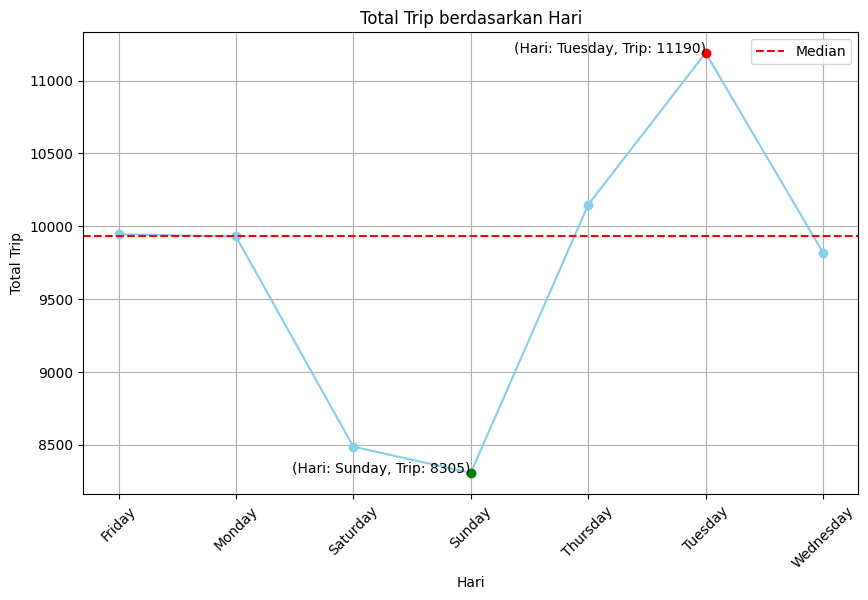

Median: 9929.0
Titik Puncak: 11190
Titik Terendah: 8305


In [340]:
# Kelompokkan data berdasarkan hari
a = df['Day'].value_counts().sort_index()

# Membuat grafik
plt.figure(figsize=(10, 6))
plt.plot(a.index, a.values, marker='o', color='skyblue', linestyle='-')
plt.title('Total Trip berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Total Trip')
plt.xticks(rotation=45)
plt.grid(True)
median_jumlah_hari = a.median()
plt.axhline(y=median_jumlah_hari, color='red', linestyle='--', label='Median')
plt.legend()
titik_puncak_hari = a.idxmax()
nilai_puncak_hari = a.max()
plt.plot(a.idxmax(), a.max(), marker='o', color='red', label='Titik Puncak')
plt.text(a.idxmax(), a.max(), f'(Hari: {a.idxmax()}, Trip: {a.max()})', ha='right')

titik_jurang_hari = a.idxmin()
nilai_jurang_hari = a.min()
plt.plot(a.idxmin(), a.min(), marker='o', color='green', label='Titik Jurang')
plt.text(a.idxmin(), a.min(), f'(Hari: {a.idxmin()}, Trip: {a.min()})', ha='right')

plt.show()
print("Median:", median_jumlah_hari)
print("Titik Puncak:",nilai_puncak_hari)
print("Titik Terendah:",nilai_jurang_hari)


In [341]:
# Filter baris dari dataset yang sesuai dengan titik puncak
titik_puncak_hari = a.idxmax()
baris_puncak_hari = df[df['Day'] == titik_puncak_hari]

# Menampilkan baris dari dataset yang sesuai dengan titik puncak
print("Baris yang sesuai dengan titik puncak grafik hari:")
display(baris_puncak_hari)

Baris yang sesuai dengan titik puncak grafik hari:


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Day,Date,hour,month,trip
2704,2,2023-01-03 00:00:46,2023-01-03 00:31:28,0.0,1.0,82,83,1.0,4.92,31.00,...,1.0,40.20,1.0,1.0,0.0,Tuesday,2023-01-03,0,1,1
2727,2,2023-01-03 00:00:36,2023-01-03 00:10:06,0.0,1.0,130,205,1.0,2.16,12.10,...,1.0,14.60,1.0,1.0,0.0,Tuesday,2023-01-03,0,1,1
2731,2,2023-01-03 00:03:04,2023-01-03 00:18:34,0.0,1.0,24,244,2.0,3.22,18.40,...,1.0,25.08,1.0,1.0,0.0,Tuesday,2023-01-03,0,1,1
2732,2,2023-01-03 00:33:28,2023-01-03 00:40:17,0.0,1.0,74,42,1.0,1.62,10.00,...,1.0,12.50,2.0,1.0,0.0,Tuesday,2023-01-03,0,1,1
2733,2,2023-01-03 00:39:34,2023-01-03 00:53:54,0.0,1.0,223,226,1.0,2.97,16.30,...,1.0,22.80,1.0,1.0,0.0,Tuesday,2023-01-03,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67813,2,2023-01-31 21:56:00,2023-01-31 22:14:00,0.0,1.0,75,186,1.0,3.92,20.72,...,0.3,25.02,5.0,1.0,0.0,Tuesday,2023-01-31,21,1,1
67814,2,2023-01-31 22:40:00,2023-01-31 22:48:00,0.0,1.0,10,205,1.0,2.14,4.41,...,1.0,5.41,5.0,1.0,0.0,Tuesday,2023-01-31,22,1,1
67815,2,2023-01-31 23:46:00,2023-02-01 00:02:00,0.0,1.0,66,37,1.0,3.44,16.53,...,1.0,21.04,5.0,1.0,0.0,Tuesday,2023-01-31,23,1,1
67816,2,2023-01-31 23:01:00,2023-01-31 23:19:00,0.0,1.0,225,189,1.0,3.03,14.98,...,1.0,19.18,5.0,1.0,0.0,Tuesday,2023-01-31,23,1,1


In [342]:
# Filter baris dari dataset yang sesuai dengan titik puncak
titik_puncak_hari = a.idxmax()
baris_puncak_hari = df[df['Day'] == titik_puncak_hari]

kolom_baru = baris_puncak_hari[['passenger_count', 'PULocationID', 'VendorID','total_amount']].sort_values(by='total_amount', ascending=False)
display(kolom_baru)

,passenger_count,PULocationID,VendorID,total_amount
18351,1.0,92,2,441.0
61969,1.0,130,2,260.0
32889,2.0,28,2,213.7
62223,1.0,166,2,156.6
48118,1.0,260,2,155.4
...,...,...,...,...
31997,1.0,193,2,4.5
3778,1.0,145,1,4.5
3529,2.0,193,2,4.5
46809,1.0,74,2,4.5


In [343]:
# Kolom-kolom yang ingin Anda tampilkan
kolom_yang_ingin_ditampilkan = ['passenger_count', 'PULocationID', 'VendorID','total_amount']

# Inisialisasi list untuk menyimpan informasi kolom
info_kolom = []

# Loop melalui setiap kolom yang ingin ditampilkan
for kolom in kolom_yang_ingin_ditampilkan:
    # Hitung jumlah nilai unik dan nilai unik untuk kolom tersebut
    jumlah_unik = baris_puncak_hari[kolom].nunique()
    nilai_unik = baris_puncak_hari[kolom].unique()

    # Tambahkan informasi ke list
    info_kolom.append([kolom, jumlah_unik, nilai_unik])

# Membuat DataFrame baru dari informasi kolom
tabel_info_kolom = pd.DataFrame(info_kolom, columns=['Nama Kolom', 'Jumlah Data', 'Unique Value',])

# Menampilkan informasi kolom
display(tabel_info_kolom)
frekuensi = df['PULocationID'].value_counts().head(10)
frekuensi_df = frekuensi.reset_index()
frekuensi_df = frekuensi_df.rename(columns={'index': 'PULocationID', 'PULocationID': 'Titik lokasi jemput'})

print("Frekuensi kemunculan 10 nilai teratas dari suatu PULocationID :")
display(frekuensi_df)

frekuensi_terendah_ = df['PULocationID'].value_counts().tail(10)
frekuensi_terendah_df_ = frekuensi_terendah_.reset_index()
frekuensi_terendah_df_ = frekuensi_terendah_df_.rename(columns={'index': 'PULocationID', 'PULocationID': 'Titik lokasi jemput'})

print("Frekuensi kemunculan 10 nilai terendah dari suatu PULocationID :")
display(frekuensi_terendah_df_)

,Nama Kolom,Jumlah Data,Unique Value
0,passenger_count,7,"[1.0, 2.0, 3.0, 5.0, 6.0, 4.0, 0.0]"
1,PULocationID,178,"[82, 130, 24, 74, 223, 210, 129, 42, 119, 80, 95, 244, 243, 75, 7, 178, 226, 83, 92, 252, 65, 97..."
2,VendorID,2,"[2, 1]"
3,total_amount,2095,"[40.2, 14.6, 25.08, 12.5, 22.8, 8.5, 9.0, 10.4, 25.86, 20.85, 13.0, 31.4, 25.8, 26.72, 9.96, 28...."


Frekuensi kemunculan 10 nilai teratas dari suatu PULocationID :


,Titik lokasi jemput,count
0,74,13233
1,75,9079
2,41,4037
3,166,3869
4,95,3829
5,82,2913
6,43,2862
7,97,2187
8,7,1952
9,244,1801


Frekuensi kemunculan 10 nilai terendah dari suatu PULocationID :


,Titik lokasi jemput,count
0,194,1
1,68,1
2,161,1
3,100,1
4,143,1
5,170,1
6,88,1
7,221,1
8,79,1
9,58,1


In [344]:
# uji statistik sederhana untuk memastikan bahwa dalam tabel frekuensi tertinggi dan terendah tidak terdapat duplikat
sama = frekuensi_df.equals(frekuensi_terendah_df_)

if sama:
    print("Kedua Frekuensi kemunculan identik, tidak ada nilai yang berbeda.")
else:
    print("Kedua Frekuensi kemunculan tidak identik, ada nilai yang berbeda.")

Kedua Frekuensi kemunculan tidak identik, ada nilai yang berbeda.


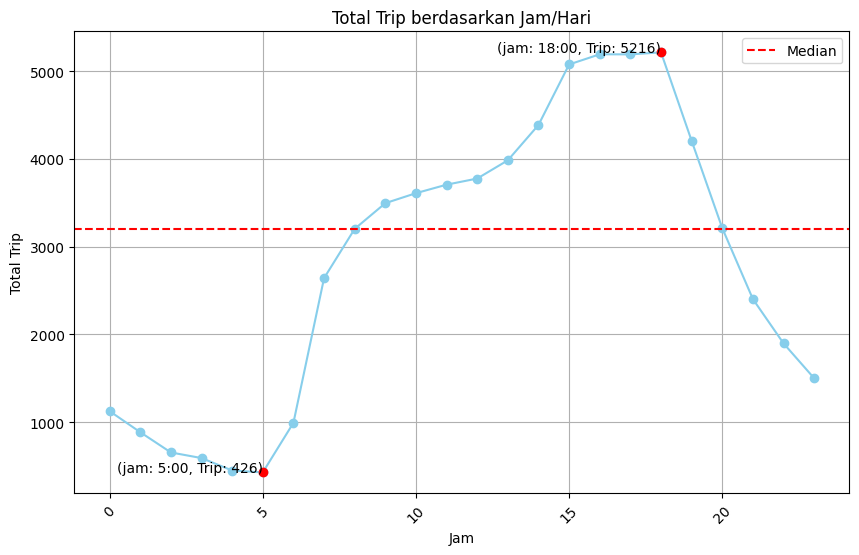

Median: 3207.0
Titik Puncak: 5216
Titik Terendah: 426


In [345]:
# Kelompokkan data berdasarkan jam
b = df['hour'].value_counts().sort_index()

# Membuat grafik
plt.figure(figsize=(10, 6))
plt.plot(b.index, b.values, marker='o', color='skyblue', linestyle='-')
plt.title('Total Trip berdasarkan Jam/Hari')
plt.xlabel('Jam')
plt.ylabel('Total Trip')
plt.xticks(rotation=45)
plt.grid(True)
median_jumlah_jam = b.median()
plt.axhline(y=median_jumlah_jam, color='red', linestyle='--', label='Median')
plt.legend()
titik_puncak_jam = b.idxmax()
nilai_puncak_jam = b.max()
plt.plot(b.idxmax(), b.max(), marker='o', color='red', label='Titik Puncak')
plt.text(b.idxmax(), b.max(), f'(jam: {b.idxmax()}:00, Trip: {b.max()})', ha='right')

titik_jurang_jam = b.idxmin()
nilai_jurang_jam = b.min()
plt.plot(b.idxmin(), b.min(), marker='o', color='red', label='Titik Jurang')
plt.text(b.idxmin(), b.min(), f'(jam: {b.idxmin()}:00, Trip: {b.min()})', ha='right')

plt.show()
print("Median:", median_jumlah_jam)
print("Titik Puncak:",nilai_puncak_jam)
print("Titik Terendah:",nilai_jurang_jam)

In [346]:
titik_puncak_jam = b.idxmax()

# Memfilter baris dari dataset yang sesuai dengan titik puncak
jam_puncak = df[df['hour'] == titik_puncak_jam]

# Menampilkan baris dari dataset yang sesuai dengan titik puncak
print("Baris yang sesuai dengan titik puncak grafik jam:")
display(jam_puncak)

Baris yang sesuai dengan titik puncak grafik jam:


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Day,Date,hour,month,trip
871,2,2023-01-01 18:01:19,2023-01-01 18:16:28,0.0,1.0,74,238,1.0,2.62,16.30,...,1.0,24.66,1.0,1.0,2.75,Sunday,2023-01-01,18,1,1
933,2,2023-01-01 18:29:09,2023-01-01 18:51:59,0.0,1.0,42,69,1.0,7.04,30.30,...,1.0,33.80,1.0,1.0,0.00,Sunday,2023-01-01,18,1,1
934,2,2023-01-01 18:48:51,2023-01-01 19:36:48,0.0,1.0,24,61,5.0,12.46,59.70,...,1.0,68.95,1.0,1.0,2.75,Sunday,2023-01-01,18,1,1
935,2,2023-01-01 18:03:01,2023-01-01 18:06:59,0.0,1.0,74,75,1.0,1.46,7.90,...,1.0,9.40,2.0,1.0,0.00,Sunday,2023-01-01,18,1,1
936,2,2023-01-01 18:34:29,2023-01-01 18:44:55,0.0,1.0,74,238,1.0,2.63,13.50,...,1.0,18.00,1.0,1.0,0.00,Sunday,2023-01-01,18,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67797,2,2023-01-31 18:16:00,2023-01-31 18:24:00,0.0,1.0,242,242,1.0,1.50,14.40,...,1.0,18.48,5.0,1.0,0.00,Tuesday,2023-01-31,18,1,1
67798,2,2023-01-31 18:53:00,2023-01-31 19:07:00,0.0,1.0,26,25,1.0,4.12,17.57,...,1.0,18.57,5.0,1.0,0.00,Tuesday,2023-01-31,18,1,1
67799,2,2023-01-31 18:02:00,2023-01-31 18:11:00,0.0,1.0,193,145,1.0,1.67,13.30,...,1.0,17.16,5.0,1.0,0.00,Tuesday,2023-01-31,18,1,1
67800,2,2023-01-31 18:27:00,2023-01-31 18:46:00,0.0,1.0,193,129,1.0,3.48,18.94,...,1.0,21.93,5.0,1.0,0.00,Tuesday,2023-01-31,18,1,1


In [347]:
# Filter baris dari dataset yang sesuai dengan titik puncak
titik_puncak_jam = b.idxmax()
baris_puncak_jam = df[df['hour'] == titik_puncak_jam]

kolom_baru_jam = baris_puncak_jam[['passenger_count', 'PULocationID', 'VendorID','total_amount']].sort_values(by='total_amount', ascending=False)
display(kolom_baru_jam)

,passenger_count,PULocationID,VendorID,total_amount
50303,1.0,223,2,232.72
23422,5.0,244,2,181.74
45877,1.0,43,2,180.85
27747,1.0,166,2,175.39
37593,1.0,130,2,175.00
...,...,...,...,...
27730,1.0,264,2,4.50
2374,1.0,92,1,4.50
12961,1.0,25,2,4.50
2348,3.0,129,2,4.50


In [348]:
# Kolom-kolom yang ingin Anda tampilkan
kolom_yang_ingin_ditampilkan_jam = ['passenger_count', 'PULocationID', 'VendorID','total_amount']

# Inisialisasi list untuk menyimpan informasi kolom
info_kolom_jam = []

# Loop melalui setiap kolom yang ingin ditampilkan
for kolom_jam in kolom_yang_ingin_ditampilkan_jam:
    # Hitung jumlah nilai unik dan nilai unik untuk kolom tersebut
    jumlah_unik_jam = baris_puncak_jam[kolom_jam].nunique()
    nilai_unik_jam = baris_puncak_jam[kolom_jam].unique()

    # Tambahkan informasi ke list
    info_kolom_jam.append([kolom_jam, jumlah_unik_jam, nilai_unik_jam])

# Membuat DataFrame baru dari informasi kolom
tabel_info_kolom_jam = pd.DataFrame(info_kolom_jam, columns=['Nama Kolom', 'Jumlah Data', 'Unique Value',])
display(tabel_info_kolom_jam)

# Menampilkan informasi kolom
frekuensi_jam = baris_puncak_jam['PULocationID'].value_counts().head(10)
frekuensi_df_jam = frekuensi_jam.reset_index()
frekuensi_df_jam = frekuensi_df_jam.rename(columns={'index': 'PULocationID', 'PULocationID': 'Titik lokasi jemput'})

print("Frekuensi kemunculan 10 nilai teratas dari suatu PULocationID :")
display(frekuensi_df_jam)

frekuensi_terendah = baris_puncak_jam['PULocationID'].value_counts().tail(10)
frekuensi_terendah_df = frekuensi_terendah.reset_index()
frekuensi_terendah_df = frekuensi_terendah_df.rename(columns={'index': 'PULocationID', 'PULocationID': 'Titik lokasi jemput'})

print("Frekuensi kemunculan 10 nilai terendah dari suatu PULocationID :")
display(frekuensi_terendah_df)

,Nama Kolom,Jumlah Data,Unique Value
0,passenger_count,7,"[1.0, 5.0, 6.0, 2.0, 4.0, 3.0, 0.0]"
1,PULocationID,125,"[74, 42, 24, 166, 41, 97, 223, 130, 260, 95, 7, 196, 66, 256, 129, 82, 193, 219, 3, 43, 75, 33, ..."
2,VendorID,2,"[2, 1]"
3,total_amount,1287,"[24.66, 33.8, 68.95, 9.4, 18.0, 10.4, 24.8, 34.45, 20.6, 13.5, 14.75, 19.2, 19.62, 10.81, 24.72,..."


Frekuensi kemunculan 10 nilai teratas dari suatu PULocationID :


,Titik lokasi jemput,count
0,74,882
1,75,826
2,82,365
3,166,289
4,43,268
5,95,267
6,97,232
7,41,211
8,260,165
9,65,156


Frekuensi kemunculan 10 nilai terendah dari suatu PULocationID :


,Titik lokasi jemput,count
0,241,1
1,120,1
2,220,1
3,18,1
4,35,1
5,70,1
6,203,1
7,93,1
8,213,1
9,26,1


In [349]:
# uji statistik sederhana untuk memastikan bahwa dalam tabel frekuensi tertinggi dan terendah tidak terdapat duplikat
sama = frekuensi_df_jam.equals(frekuensi_terendah_df)

if sama:
    print("Kedua Frekuensi kemunculan identik, tidak ada nilai yang berbeda.")
else:
    print("Kedua Frekuensi kemunculan tidak identik, ada nilai yang berbeda.")

Kedua Frekuensi kemunculan tidak identik, ada nilai yang berbeda.


persentase kenaikan titik puncak terhadap median nya dalam grafik titik puncak harian

In [350]:
selisih_pertumbuhan_harian = nilai_puncak_hari - median_jumlah_hari
persentase_kenaikan_harian = (selisih_pertumbuhan_harian/median_jumlah_hari)*100
print("Persentase kenaikan titik puncak harian:", persentase_kenaikan_harian, "%")

Persentase kenaikan titik puncak harian: 12.700171215630979 %


In [351]:
selisih_pertumbuhan_jam = nilai_puncak_jam - median_jumlah_jam
persentase_kenaikan_jam = (selisih_pertumbuhan_harian/median_jumlah_jam)*100
print("Persentase kenaikan titik puncak jam:", persentase_kenaikan_jam, "%")

Persentase kenaikan titik puncak jam: 39.32023698160275 %


selanjutnya perlu untuk mengetahui harga satuan rata-rata

Persentase rata-rata pendapatan tiap tanggal: Date
2009-01-01    43.200000
2023-01-01    23.904358
2023-01-02    21.670805
2023-01-03    21.399834
2023-01-04    20.783151
2023-01-05    22.449142
2023-01-06    21.672634
2023-01-07    21.322307
2023-01-08    20.613804
2023-01-09    21.878490
2023-01-10    21.939236
2023-01-11    22.048053
2023-01-12    21.977913
2023-01-13    22.556440
2023-01-14    21.682783
2023-01-15    22.153755
2023-01-16    21.726890
2023-01-17    22.211138
2023-01-18    22.338278
2023-01-19    22.393439
2023-01-20    21.886943
2023-01-21    21.870844
2023-01-22    20.989140
2023-01-23    21.553301
2023-01-24    21.915907
2023-01-25    21.916133
2023-01-26    22.230168
2023-01-27    21.896508
2023-01-28    22.103280
2023-01-29    21.836587
2023-01-30    22.000690
2023-01-31    22.235144
Name: total_amount, dtype: float64 %


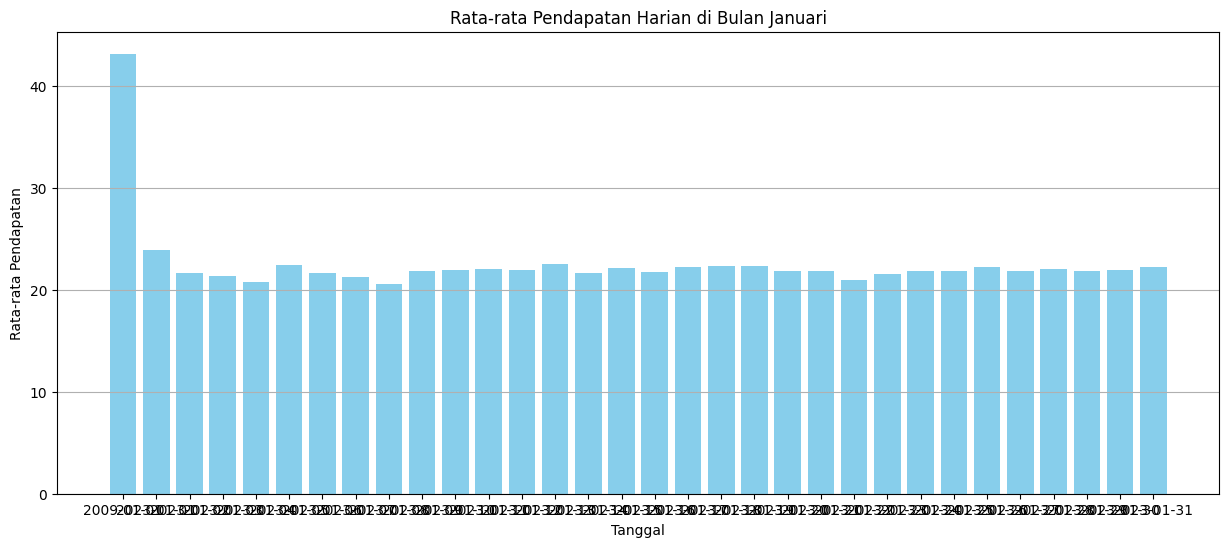

Rata-rata total pendapatan disetiap hari (tgl 1-31): $ 22.573659144214773
Rata-rata total pendapatan disetiap jam (tgl 1-31): $ 0.9405691310089489


In [352]:
# Kelompokkan data berdasarkan tanggal dan hitung rata-rata pendapatannya
rata_rata_pendapatan_harian = df.groupby(df['Date'])['total_amount'].mean()
print("Persentase rata-rata pendapatan tiap tanggal:", rata_rata_pendapatan_harian, "%")
# Membuat bar plot
plt.figure(figsize=(15, 6))
plt.bar(rata_rata_pendapatan_harian.index, rata_rata_pendapatan_harian.values, color='skyblue')
plt.title('Rata-rata Pendapatan Harian di Bulan Januari')
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata Pendapatan')
plt.xticks(rata_rata_pendapatan_harian.index)
plt.grid(axis='y')
plt.show()
print("Rata-rata total pendapatan disetiap hari (tgl 1-31): $", rata_rata_pendapatan_harian.mean())
print("Rata-rata total pendapatan disetiap jam (tgl 1-31): $", (rata_rata_pendapatan_harian.mean())/24)

oleh karea tidak diketahui berapa jumlah pelayanan (sarana/driver)yang tersedia (tanpa melihat taxi zone) maka perlu membuat asumsi perhitungan rata-ratanya

perhitungan estimasi jumlah pelayanan (sarana/driver) dalam 1 hari:

rata-rata trip dalam 1 hari x rata-rata lama trip 1 hari / 7 jam kerja


In [353]:
# rata-rata dari selisih waktu
df['start_time'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['end_time'] = pd.to_datetime(df['lpep_dropoff_datetime'])

selisih_waktu = (df['end_time'] - df['start_time']).dt.total_seconds() / 3600
rata_rata_selisih = selisih_waktu.mean()
print("Rata-rata trip dalam 1 hari:", int(median_jumlah_hari))
print("Rata-rata lama trip:", rata_rata_selisih,'jam')
jumlah_pelayanan = median_jumlah_hari*rata_rata_selisih/7
print("total jumlah (sarana/driver) :", int(jumlah_pelayanan),'(sarana/driver)')
mampu_terima_order = 7/rata_rata_selisih
print("Rata-rata jumlah orderan untuk 1 (sarana/driver) per hari:",int(mampu_terima_order),'orderan')

Rata-rata trip dalam 1 hari: 9929
Rata-rata lama trip: 0.3006727851668353 jam
total jumlah (sarana/driver) : 426 (sarana/driver)
Rata-rata jumlah orderan untuk 1 (sarana/driver) per hari: 23 orderan


harga satuan per trip (driver/sarana)

berdasarkan penentuan SCR atau situation, complication dan resolution maka dapat didefinisikan bahwa dari hasil data analisis didapatkan


*   situation:
informasi yang didapat dari hasil analisis:
1. Jumlah total trip: 678181.
2. Rata-rata trip dalam 1 hari: 9929
1. Rata-rata lama trip: 0.3006727851668353 jam
2. total jumlah (sarana/driver) : 426 (sarana/driver)
3. Rata-rata jumlah orderan untuk 1 (sarana/driver) per hari: 23 orderan
4. Rata-rata total pendapatan disetiap hari (tgl 1-31): $ 22.57

5. Rata-rata total pendapatan disetiap jam (tgl 1-31): $ 0.94
6. Median trip harian: 9929.0
7. Titik Puncak harian: 11190
8. hari titik puncak: Tuesday
9. Median trip dalam jam: 3207.0
10. Titik Puncak pada jam: 5216
11. jam titik puncak: 18.00
12. Persentase kenaikan titik puncak harian: 12.70 %
13. Persentase kenaikan titik puncak harian: 39.32 %
14. jumlah trip pada titik terendah harian: 8305
15. hari titik terendah: Sunday
16. jumlah trip pada titik terendah pada jam: 426
17. jam titik terendah: 05.00
18. 10 lokasi taxi-zone dengan order tertinggi pada titik puncak harian: 74, 75, 41, 166, 95, 82, 43, 97, 7 dan 244
19. 10 lokasi taxi-zone dengan order tertinggi pada titik puncak jam:
74, 75, 41, 166, 95, 82, 43, 97, 7 dan 244
20. 10 lokasi taxi-zone dengan order terendah pada titik puncak jam: 241,120, 220, 18, 35, 70, 203, 93, 213,26
21. 10 lokasi taxi-zone dengan order terendah pada titik puncak harian: 194, 68, 161, 100, 143, 170, 88, 221, 79, 58


*   complication:
terdapat alasan dibalik permasalahan yang dapat dianalisis bahwa
1. terdapat sebaran trip yang tidak merata pada hari tertentu dalam 1 minggu dan pada jam tertentu dalam 1 hari
2. terdapat sebaran trip yang tidak merata pada lokasi penjemputan/pelayanan
3. terdapat jumlah trip rata-rata yang dapat mengasumsikan jumlah sarana yang ada dalam 1 hari yang masih dapat dioptimalkan
4. terdapat jumlah rata-rata tarif regular untuk pendapatan atau harga satuan (tarif/trip) yang masih dapat dioptimalkan dengan kondisi khusus

tujuan pemecahan masalah diatas adalah:
mendapatkan potensi peningkatan kepuasan pelayanan pelanggan melalui peningkatan jumlah layanan yang disediakan sekaligus memberikan potensi estimasi peningkatan pendapatan melalui pengaturan penyebaran layanan

selanjutnya, perlu untuk mengembangkan analisis penyebab dan/atau dampak hingga didapatkan solusi yang efektif, efisien dan tepat sasaran
* resolution, akan dibahas dibawah ini


# Rekomendasi

solusi yang ingin didapatkan selayaknya dapat menyelesaikan masalah bahkan sekaligus memberikan dampak positif bagi perusahaan. metode yang ingin digunakan adalah dengan mendefinisikan terlebih dahulu permasalahannya dan memecahnya dalam bentuk akar penyebab sehingga dapat memberikan solusi pada akar penyebab tersebut bahkan membawa dampak positif.

Problem: Belum optimalnya pelayanan dan total pendapatan

akar penyebab:
1. keterbatasan layanan (sana/driver) pada suatu jam dan/atau hari tertentu yang berpotensi tidak dapat mengakomodir permintaan pada jam atau hari sibuk (titik puncak)
2. tidak meratanya sebaran waktu dan lokasi layanan (sarana/driver)

Resolution:
terdapat 2 rekomendasi yang dapat diambil oleh perusahaan yaitu:
rekomendasi:
1. menambah jumlah aset atau layanan (sarana/driver) pada waktu dan lokasi tertentu
2. menaikan harga tarif dasar pada waktu dan lokasi tertentu



Tindak lanjut dari 2 rekomendasi ini sulit untuk dilakukan karena:
1. menambah jumlah aset akan menambah anggaran investasi sehingga membutuhkan dana yang tidak sedikit, selain itu pada saat hari dan jam normal maka aset berpotensi akan menganggur (idle)
2. menaikan harga tarif dasar pada waktu tertentu akan berpotensi menurunkan kepuasan pelanggan pada rentang waktu tersebut diluar dari titik puncaknya

sehingga perlu adanya rekomendasi alternatif yaitu:
1. memindahkan sementara sebaran aset pelayanan (sarana/driver) pada waktu dan lokasi pada saat titik puncak.
2. memberikan harga tambahan hanya pada saat titik puncak terjadi.



*   Resolution:


1.   memindahkan sementara sebaran aset pelayanan (sarana/driver) pada waktu dan lokasi pada saat titik puncak
2.   memberikan harga tambahan hanya pada saat titik puncak terjadi





## Menghitung dampak positif penerapan rekomendasi 1

melihat kapasitas pemindahan sarana adalah dari 10 lokasi yang terendah ke 10 lokasi tersibuk, dengan jumlah selisih nilai pada titik terendah dengan mediannya baik pada harian maupun jam

selanjutnya, jumlah sarana x harga satuan per trip x kapasitas orderan per 1 sarana

In [354]:
#rata-rata orderan pada setiap lokasi
frekuensi_rata = int(df['PULocationID'].mean())
print("rata-rata orderan setiap lokasi pada keadaan normal:",frekuensi_rata)

idle = int(frekuensi_rata/mampu_terima_order)
print('jumlah sarana yang idle dan dapat dipindahkan ke lokasi padat orderan:',idle )

rata-rata orderan setiap lokasi pada keadaan normal: 98
jumlah sarana yang idle dan dapat dipindahkan ke lokasi padat orderan: 4


berdasarkan infomasi diatas maka terdapat 4 sarana yang menganggur (idle) pada lokasi taxi-zone di jam dan hari puncak nya

estimasi penambahan pendapatan harian = 4 sarana x 10 lokasi x kapasitas orderan per sarana x rata-rata tarif regular per hari

estimasi penambahan pendapatan per jam = 4 sarana x 10 lokasi x kapasitas orderan per sarana x rata-rata tarif regular per jam

In [355]:
est_peningkatan_harian = (4*idle)*(10)*mampu_terima_order*(rata_rata_pendapatan_harian.mean())
est_peningkatan_jam = (4*idle)*(10)*mampu_terima_order*(rata_rata_pendapatan_harian.mean()/24)

print('estimasi pendapatan jika memindahkan sarana berdasarkan hari puncak: $',est_peningkatan_harian,'/ minggu')

print('estimasi pendapatan jika memindahkan sarana berdasarkan jam puncak: $',est_peningkatan_jam,'/ hari')

estimasi pendapatan jika memindahkan sarana berdasarkan hari puncak: $ 84086.42048362295 / minggu
estimasi pendapatan jika memindahkan sarana berdasarkan jam puncak: $ 3503.60085348429 / hari


setting pemindahan sarana berdasarkan titik puncak harian:

10 sarana dari lokasi taxi-zone (order terendah pada titik puncak) harian, yaitu :194, 68, 161, 100, 143, 170, 88, 221, 79 dan 58

menuju
10 lokasi taxi-zone dengan order tertinggi pada titik puncak harian yaitu: 74, 75, 41, 166, 95, 82, 43, 97, 7 dan 244

setting pemindahan sarana berdasarkan jam titik puncak:

10 sarana dari lokasi taxi-zone (order terendah pada titik puncak) jam, yaitu :241, 120, 220, 18, 35, 70, 203, 93, 213 dan 26

menuju
10 lokasi taxi-zone dengan order tertinggi pada titik puncak jam, yaitu: 74, 75, 41, 166, 95, 82, 43, 97, 7 dan 244

## Menghitung dampak positif penerapan rekomendasi 2

penambahan $1 per orderan untuk setiap hari titik puncak harian (Tuesday) dapat memberikan perbedaan terhadap pendapatan

In [356]:
peningkatan_tarif = nilai_puncak_hari+((4*idle)*(10)*mampu_terima_order)*1
print('pendapatan tambahan jika terdapat penyusuaian tarif titik puncak harian: $',peningkatan_tarif,'minggu')

pendapatan tambahan jika terdapat penyusuaian tarif titik puncak harian: $ 14914.979629860885 minggu


## Total pemasukan jika diterapkan Rekomendasi 1 dan 2

In [357]:
# dalam 1 bulan (4 minggu untuk pengali titik puncak harian) dan (31 hari untuk pengali jam titik puncak)
total_rekom = (est_peningkatan_harian *4) + (peningkatan_tarif*4) + (est_peningkatan_jam*31)
print ('Total estimasi pendapatan jika menerapkan 2 rekomendasi yang disarankan adalah: $',total_rekom,'per bulan januari')


Total estimasi pendapatan jika menerapkan 2 rekomendasi yang disarankan adalah: $ 504617.2269119483 per bulan januari
